In [11]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [12]:
import os
directory = '/content'
for filename in os.listdir(directory):
    if filename.endswith(".mid"):
        print(os.path.join(directory, filename))

/content/schub_d760_1.mid
/content/schub_d760_4.mid
/content/schuim-2.mid
/content/schuim-4.mid
/content/schumm-3.mid
/content/schub_d960_3.mid
/content/schumm-2.mid
/content/schu_143_1.mid
/content/schub_d960_2.mid
/content/schuim-1.mid
/content/schubert_D850_4.mid
/content/schubert_D850_3.mid
/content/schubert_D850_1.mid
/content/schubert_D850_2.mid
/content/schu_143_2.mid
/content/schub_d760_3.mid
/content/schuim-3.mid
/content/schumm-5.mid
/content/schubert_D935_1.mid
/content/schub_d960_1.mid
/content/schu_143_3.mid
/content/schubert_D935_3.mid
/content/schumm-4.mid
/content/schumm-1.mid
/content/schumm-6.mid
/content/schubert_D935_2.mid
/content/schub_d760_2.mid
/content/schubert_D935_4.mid
/content/schub_d960_4.mid


In [13]:
files=[i for i in os.listdir(directory) if i.endswith(".mid")]
files

['schub_d760_1.mid',
 'schub_d760_4.mid',
 'schuim-2.mid',
 'schuim-4.mid',
 'schumm-3.mid',
 'schub_d960_3.mid',
 'schumm-2.mid',
 'schu_143_1.mid',
 'schub_d960_2.mid',
 'schuim-1.mid',
 'schubert_D850_4.mid',
 'schubert_D850_3.mid',
 'schubert_D850_1.mid',
 'schubert_D850_2.mid',
 'schu_143_2.mid',
 'schub_d760_3.mid',
 'schuim-3.mid',
 'schumm-5.mid',
 'schubert_D935_1.mid',
 'schub_d960_1.mid',
 'schu_143_3.mid',
 'schubert_D935_3.mid',
 'schumm-4.mid',
 'schumm-1.mid',
 'schumm-6.mid',
 'schubert_D935_2.mid',
 'schub_d760_2.mid',
 'schubert_D935_4.mid',
 'schub_d960_4.mid']

In [14]:
from music21 import *

In [15]:
import warnings
from music21 import converter, instrument, note, chord
warnings.filterwarnings("ignore", category=UserWarning, module="music21.midi.translate")

In [16]:
def read_midi(file):
    print('loading music file:',file)
    notes=[]
    notes_to_parse=None
    midi = converter.parse(file)
    s2=instrument.partitionByInstrument(midi)

    for part in s2.parts:
        if 'Piano' in str(part):
            notes_to_parse=part.recurse()
            for element in notes_to_parse:
                if isinstance(element, note.Note):
                    notes.append(str(element.pitch))
                elif isinstance(element, chord.Chord):
                    notes.append('.'.join(str(n) for n in element.normalOrder))
    return np.array(notes)

In [17]:
file_paths = [os.path.join(directory, filename) for filename in files]
notes_array = np.array([read_midi(file_path) for file_path in file_paths])

loading music file: /content/schub_d760_1.mid
loading music file: /content/schub_d760_4.mid
loading music file: /content/schuim-2.mid
loading music file: /content/schuim-4.mid
loading music file: /content/schumm-3.mid
loading music file: /content/schub_d960_3.mid
loading music file: /content/schumm-2.mid
loading music file: /content/schu_143_1.mid
loading music file: /content/schub_d960_2.mid
loading music file: /content/schuim-1.mid
loading music file: /content/schubert_D850_4.mid
loading music file: /content/schubert_D850_3.mid
loading music file: /content/schubert_D850_1.mid
loading music file: /content/schubert_D850_2.mid
loading music file: /content/schu_143_2.mid
loading music file: /content/schub_d760_3.mid
loading music file: /content/schuim-3.mid
loading music file: /content/schumm-5.mid
loading music file: /content/schubert_D935_1.mid
loading music file: /content/schub_d960_1.mid
loading music file: /content/schu_143_3.mid
loading music file: /content/schubert_D935_3.mid
load

<ipython-input-17-4a111965f4e6>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  notes_array = np.array([read_midi(file_path) for file_path in file_paths])


In [18]:
notes_array[0]

array(['0.4.7', '7.0', '0.4.7', ..., '6.9', '0.3', '6.8'], dtype='<U8')

In [19]:
notes_=[element for note_ in notes_array for element in note_]
unique_notes=list(set(notes_))
len(unique_notes)

345

In [20]:
unique_notes[0]

'1.3'

(array([221.,  40.,  31.,  13.,   8.,   3.,   7.,   9.,   7.,   6.]),
 array([1.0000e+00, 1.6170e+02, 3.2240e+02, 4.8310e+02, 6.4380e+02,
        8.0450e+02, 9.6520e+02, 1.1259e+03, 1.2866e+03, 1.4473e+03,
        1.6080e+03]),
 <BarContainer object of 10 artists>)

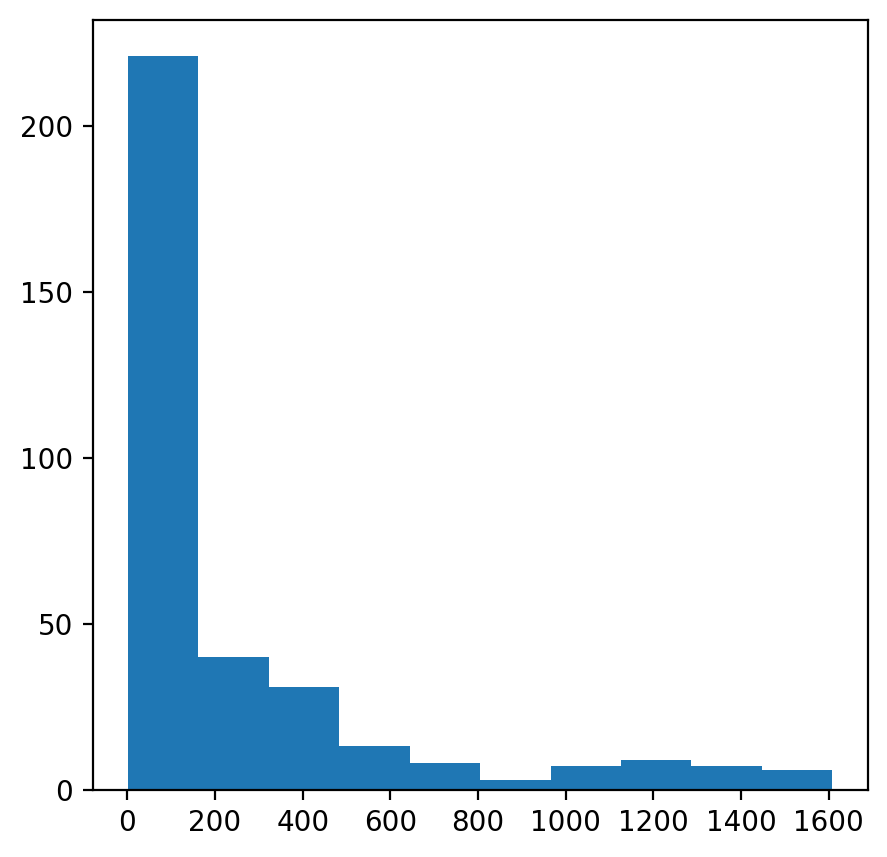

In [21]:
from collections import Counter
freq = dict(Counter(notes_))
import matplotlib.pyplot as plt
no=[count for _,count in freq.items()]
plt.figure(figsize=(5,5))
plt.hist(no)

In [22]:
frequent_notes = [note_ for note_, count in freq.items() if count>=50]
print(len(frequent_notes))

182


In [23]:
new_music=[]
for notes in notes_array:
    temp=[]
    for note_ in notes:
        if note_ in frequent_notes:
            temp.append(note_)
    new_music.append(temp)
new_music = np.array(new_music)
new_music

<ipython-input-23-1b09c186a2e5>:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_music = np.array(new_music)


array([list(['0.4.7', '7.0', '0.4.7', '7.0', '0.4.7', '7.0', '0.4.7', '7.0', '0.4.7', '7.0', '0.4.7', '7.0', '0.4.7', '7.0', 'C3', 'E3', 'G3', 'C4', 'E4', 'G4', '11', '0', '0', '7', '11.2.5.7', '7', '11.2.5.7', '7', '11.2.5.7', '7', '11.2.5.7', '7', '11.2.5.7', '7', '11.2.5.7', '7', '11.2.5.7', '7', '11.2.5.7', '7', 'G3', 'B3', 'D4', 'F4', 'G4', 'B4', '1', '2', '2', '0.3.7', '7.0', '0.4.7', '7.0', 'G3', 'C4', 'E4', 'G4', 'C5', 'E5', '4.7', '0', '4.7', '4.7', '2.7', '11', '11', '2.7', '11', '7.0', '9', '0.6', '2', '0.6', '7.11', '7', 'G3', 'C4', 'E4', 'G4', 'C5', 'E5', '4.7', '0', '4.7', '4.7', '2.7', '11', '11', '2.7', '11', '7.0', '9', '0.6', '2', '0.6', '7.11', '7', 'C4', 'F4', 'A4', 'C5', 'F5', 'A5', '9.0', '5', '9.0', '9.0', '7.0', '4', '4', '7.0', '4', '0.5', '2', '5.11', '7', '5.11', '11.4', '0', '4.9', '5', '5', '9.2', '11', '2.8', '4', '2.8', '9.0', '9', '9.0', '9', '7', '4.9', 'F1', 'A5', 'F2', '4.9', 'F1', 'A5', 'F2', '4.9', 'F1', 'A5', 'F2', '4.9', 'F1', 'A5', 'F2', '4.9', '

In [24]:
new_music.shape

(29,)

In [25]:
no_of_timesteps = 32
x = []
y = []
for note_ in new_music:
    for i in range(0, len(note_) - no_of_timesteps, 1):
        input_ = note_[i:i + no_of_timesteps]
        output = note_[i + no_of_timesteps]
        x.append(input_)
        y.append(output)
x=np.array(x)
y=np.array(y)

In [26]:
x

array([['0.4.7', '7.0', '0.4.7', ..., '7', '11.2.5.7', '7'],
       ['7.0', '0.4.7', '7.0', ..., '11.2.5.7', '7', '11.2.5.7'],
       ['0.4.7', '7.0', '0.4.7', ..., '7', '11.2.5.7', '7'],
       ...,
       ['G5', 'B-1', 'F2', ..., '10.2.5', 'B-1', '10.2.5'],
       ['B-1', 'F2', 'F5', ..., 'B-1', '10.2.5', '10.2.5'],
       ['F2', 'F5', 'B-2', ..., '10.2.5', '10.2.5', 'B-3']], dtype='<U8')

In [27]:
y

array(['11.2.5.7', '7', '11.2.5.7', ..., '10.2.5', 'B-3', '10'],
      dtype='<U8')

In [28]:
unique_x=list(set(x.ravel()))
x_note_to_int=dict((note_,number) for number,note_ in enumerate(unique_x))
x_note_to_int

{'1.3': 0,
 'E-3': 1,
 '0.1': 2,
 '7.10.2': 3,
 '4.7': 4,
 'B-1': 5,
 '3.7.10': 6,
 '10.0': 7,
 '10.11': 8,
 '9.11': 9,
 '11': 10,
 'E2': 11,
 '5.8': 12,
 'E-6': 13,
 '9.0': 14,
 '8.11.2': 15,
 '0.2': 16,
 'G5': 17,
 '9.10': 18,
 '5.9.0': 19,
 '1.5.8': 20,
 '10': 21,
 '9.0.4': 22,
 '8.1': 23,
 '4.8': 24,
 '2': 25,
 'D2': 26,
 'E-5': 27,
 '11.1': 28,
 'F#4': 29,
 'C2': 30,
 '7.0': 31,
 'F4': 32,
 'A3': 33,
 '3.8': 34,
 '9.0.2': 35,
 '0': 36,
 'F#3': 37,
 '3.7': 38,
 '1.4.7.10': 39,
 'C3': 40,
 '4.9': 41,
 'G#6': 42,
 '5.8.11': 43,
 'A6': 44,
 '2.5': 45,
 '3': 46,
 '7.8': 47,
 'C4': 48,
 '5.7': 49,
 '2.6': 50,
 'E6': 51,
 '11.2.5.7': 52,
 'F#5': 53,
 '11.3': 54,
 '1.4.8': 55,
 '0.2.6': 56,
 '7.10': 57,
 'G#1': 58,
 '4': 59,
 'F6': 60,
 '4.7.11': 61,
 '8.11': 62,
 'B3': 63,
 'A1': 64,
 '1.4': 65,
 '0.6': 66,
 '7.10.0': 67,
 '7.9.1': 68,
 '7.11': 69,
 '0.3.6': 70,
 'F#2': 71,
 '7.11.2': 72,
 'E5': 73,
 '2.5.7': 74,
 '10.1.4': 75,
 'C#4': 76,
 '6.9': 77,
 '2.5.9': 78,
 '11.2.4': 79,
 'F1': 

In [29]:
x_seq=[]
for i in x:
    temp=[]
    for j in i:
        temp.append(x_note_to_int[j])
    x_seq.append(temp)
x_seq = np.array(x_seq)

In [30]:
unique_y = list(set(y))
y_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_y))
y_seq=np.array([y_note_to_int[i] for i in y])

In [31]:
x_seq

array([[154,  31, 154, ...,  96,  52,  96],
       [ 31, 154,  31, ...,  52,  96,  52],
       [154,  31, 154, ...,  96,  52,  96],
       ...,
       [ 17,   5, 181, ..., 103,   5, 103],
       [  5, 181, 116, ...,   5, 103, 103],
       [181, 116,  91, ..., 103, 103, 144]])

In [32]:
y_seq

array([ 52,  96,  52, ..., 103, 144,  21])

In [33]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(x_seq,y_seq,test_size=0.2,random_state=0)

In [34]:
def lstm():
  model = Sequential()
  model.add(LSTM(128,return_sequences=True))
  model.add(LSTM(128))
  model.add(Dense(256))
  model.add(Activation('relu'))
  model.add(Dense(n_vocab))
  model.add(Activation('softmax'))
  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')
  return model

In [35]:
from keras.layers import *
from keras.models import *
from keras.callbacks import *
import keras.backend as K

K.clear_session()
model = Sequential()
model.add(Embedding(len(unique_x), 100, input_length=32,trainable=True))

model.add(Conv1D(64,3, padding='causal',activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))

model.add(Conv1D(128,3,activation='relu',dilation_rate=2,padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))

model.add(Conv1D(256,3,activation='relu',dilation_rate=4,padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))
model.add(GlobalMaxPool1D())

model.add(Dense(256, activation='relu'))
model.add(Dense(len(unique_y), activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 32, 100)           18200     
                                                                 
 conv1d (Conv1D)             (None, 32, 64)            19264     
                                                                 
 dropout (Dropout)           (None, 32, 64)            0         
                                                                 
 max_pooling1d (MaxPooling1  (None, 16, 64)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 16, 128)           24704     
                                                                 
 dropout_1 (Dropout)         (None, 16, 128)           0         
                                                        

In [36]:
mc=ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True,verbose=1)

In [37]:
history = model.fit(np.array(x_tr),np.array(y_tr),batch_size=128,epochs=50, validation_data=(np.array(x_val),np.array(y_val)),verbose=1, callbacks=[mc])

Epoch 1/50
492/492 [==============================] - ETA: 0s - loss: 4.3198
Epoch 1: val_loss improved from inf to 4.08066, saving model to best_model.h5
492/492 [==============================] - 43s 83ms/step - loss: 4.3198 - val_loss: 4.0807
Epoch 2/50
  2/492 [..............................] - ETA: 33s - loss: 3.8526

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


491/492 [============================>.] - ETA: 0s - loss: 3.8307
Epoch 2: val_loss improved from 4.08066 to 3.84267, saving model to best_model.h5
492/492 [==============================] - 41s 83ms/step - loss: 3.8304 - val_loss: 3.8427
Epoch 3/50
491/492 [============================>.] - ETA: 0s - loss: 3.6635
Epoch 3: val_loss improved from 3.84267 to 3.76967, saving model to best_model.h5
492/492 [==============================] - 40s 82ms/step - loss: 3.6635 - val_loss: 3.7697
Epoch 4/50
491/492 [============================>.] - ETA: 0s - loss: 3.5382
Epoch 4: val_loss improved from 3.76967 to 3.61417, saving model to best_model.h5
492/492 [==============================] - 40s 82ms/step - loss: 3.5380 - val_loss: 3.6142
Epoch 5/50
491/492 [============================>.] - ETA: 0s - loss: 3.4410
Epoch 5: val_loss improved from 3.61417 to 3.55877, saving model to best_model.h5
492/492 [==============================] - 40s 82ms/step - loss: 3.4407 - val_loss: 3.5588
Epoch 6/50


In [73]:
from keras.models import load_model
model=load_model('best_model.h5')

In [74]:
import random
ind=np.random.randint(0,len(x_val)-1)
random_music=x_val[ind]
predictions=[]
for i in range(10):

    random_music = random_music.reshape(1,no_of_timesteps)
    prob=model.predict(random_music)[0]


    y_pred=np.argmax(prob,axis=0)
    predictions.append(y_pred)


    random_music = np.insert(random_music[0],len(random_music[0]),y_pred)
    random_music = random_music[1:]
predictions

1/1 [==============================] - 0s 22ms/step


[63, 27, 163, 27, 163, 73, 73, 73, 73, 73]

In [75]:
x_int_to_note= dict((number,note_) for number,note_ in enumerate(unique_x))
predicted_notes=[x_int_to_note[i] for i in predictions]

In [93]:
predicted_notes

['B3', 'E-5', 'A4', 'E-5', 'A4', 'E5', 'E5', 'E5', 'E5', 'E5']

In [94]:
def convert_to_midi(prediction_output):
    offset = 0
    output_notes = []
    for pattern in prediction_output:
        if ('.' in pattern) or pattern.isdigit():
            notes_in_chord = pattern.split('.')
            notes = []
            for current_note in notes_in_chord:

                cn=int(current_note)
                new_note = note.Note(cn)
                new_note.storedInstrument = instrument.Piano()
                notes.append(new_note)

            new_chord = chord.Chord(notes)
            new_chord.offset = offset
            output_notes.append(new_chord)

        else:
            new_note = note.Note(pattern)
            new_note.offset = offset
            new_note.storedInstrument = instrument.Piano()
            output_notes.append(new_note)
        offset += 1
    midi_stream = stream.Stream(output_notes)
    midi_stream.write('midi', fp='output.midi')

In [95]:
convert_to_midi(predicted_notes)

In [99]:
from midi2audio import FluidSynth
fs = FluidSynth()
fs.midi_to_audio('output.midi', 'output.wav')

In [79]:
for pattern in predicted_notes:
    if '.' in pattern or pattern.isdigit():
        notes_in_chord = pattern.split('.')
        chord_notes = [note.Note(int(n)) for n in notes_in_chord]
        chord_str = ' '.join([str(n) for n in chord_notes])
        print(f'Chord: {chord_str}')
    else:
        print(f'Note: {pattern}')

Note: B3
Note: E-5
Note: A4
Note: E-5
Note: A4
Note: E5
Note: E5
Note: E5
Note: E5
Note: E5


In [101]:
from music21 import environment
lilypond_path = '/usr/bin/lilypond'
environment.set("lilypondPath", lilypond_path)

In [90]:
from music21 import stream, note, duration, instrument
def create_music_score(predicted_notes):
    music_score = stream.Score()
    part = stream.Part()
    music_score.append(part)
    piano = instrument.Piano()
    part.insert(0, piano)
    for note_name in predicted_notes:
        new_note = note.Note(note_name)
        new_note.duration = duration.Duration(1.0)
        part.append(new_note)
    return music_score
music_score = create_music_score(predicted_notes)
music_score.write('lily.png', fp='music_score')

PosixPath('music_score.png')

In [91]:
from pathlib import PosixPath
path_obj = PosixPath('music_score.png')
file_path = str(path_obj)
file_path

music_score.png


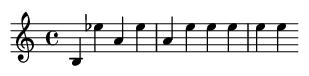

In [92]:
from PIL import Image
from IPython.display import display
img = Image.open(file_path)
display(img)

In [100]:
from IPython.display import Audio
audio_path = 'output.wav'
Audio(audio_path)